# Ejercicios

10. Train a deep MLP on the MNIST dataset (you can load it using
`keras.datasets.mnist.load_data()`. See if you can get over
98% precision. Try searching for the optimal learning rate by
using the approach presented in this chapter (i.e., by growing the
learning rate exponentially, plotting the error, and finding the
point where the error shoots up). Try adding all the bells and
whistles—save checkpoints, use early stopping, and plot learning
curves using TensorBoard.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

2021-12-07 01:10:55.184760: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-07 01:10:55.184813: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
mnist = keras.datasets.mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [3]:
X_train,X_test = X_train/255.0,X_test/255.0 #Scaling
X_valid,X_train = X_train[:5000],X_train[5000:]
y_valid,y_train = y_train[:5000],y_train[5000:] 

In [4]:
# Creating model with Sequential API
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

2021-12-06 20:21:39.158867: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-06 20:21:39.158915: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-06 20:21:39.158933: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-M8PFI60): /proc/driver/nvidia/version does not exist
2021-12-06 20:21:39.159120: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [7]:
# Training and evaluating the model
history = model.fit(X_train,y_train,epochs=30,
                    validation_data=(X_test,y_test))

2021-12-06 20:21:39.460589: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5869 - accuracy: 0.8460 - val_loss: 0.3102 - val_accuracy: 0.9131
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2871 - accuracy: 0.9174 - val_loss: 0.2465 - val_accuracy: 0.9302
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2328 - accuracy: 0.9330 - val_loss: 0.2020 - val_accuracy: 0.9432
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1983 - accuracy: 0.9436 - val_loss: 0.1822 - val_accuracy: 0.9486
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1727 - accuracy: 0.9505 - val_loss: 0.1683 - val_accuracy: 0.9514
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1533 - accuracy: 0.9556 - val_loss: 0.1491 - val_accuracy: 0.9569
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1366 - accuracy: 0.9614 - val_loss: 0.1397 - val_accuracy:

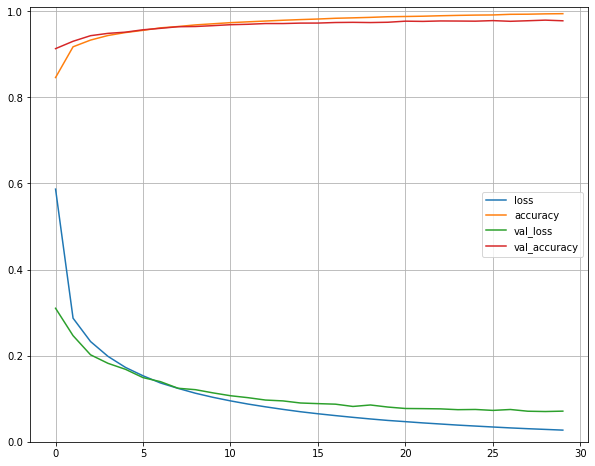

In [10]:
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid()
plt.gca().set_ylim(0,1.01)
plt.show()

In [11]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9778


[0.07119472324848175, 0.9778000116348267]

In [16]:
# Fine-tuning hyperparameters & early stopping

def build_model(n_hidden=2,n_neurons_1=30,n_neurons_2=20,n_neurons_3=10,
                learning_rate=3e-3,input_shape=[28,28]):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    n_neurons = [n_neurons_1,n_neurons_2,n_neurons_3]
    for i in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons[i],activation='relu'))
    model.add(keras.layers.Dense(10,activation='softmax'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimizer,metrics=['accuracy'])
    return model

keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [17]:
keras_clf.fit(X_train,y_train,epochs=10,
             validation_data=(X_valid,y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
keras_clf.score(X_test,y_test)

Epoch 1/10
1719/1719 [==============================] - 3s 1ms/step - loss: 1.3302 - accuracy: 0.6436 - val_loss: 0.7530 - val_accuracy: 0.8182
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6177 - accuracy: 0.8435 - val_loss: 0.5038 - val_accuracy: 0.8748
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4717 - accuracy: 0.8767 - val_loss: 0.4169 - val_accuracy: 0.8936
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4098 - accuracy: 0.8903 - val_loss: 0.3728 - val_accuracy: 0.9032
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3749 - accuracy: 0.8975 - val_loss: 0.3452 - val_accuracy: 0.9096
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3517 - accuracy: 0.9024 - val_loss: 0.3261 - val_accuracy: 0.9140
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3347 - accuracy: 0.9071 - val_loss: 0.3120 - val_accuracy:

0.920799970626831

In [18]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [20]:
param_distribs = {'n_hidden': [2,3],
                  'n_neurons_1': np.arange(200,420,20),
                  'n_neurons_2': np.arange(100,220,20),
                  'n_neurons_3': np.arange(20,110,10),
                  'learning_rate': reciprocal(25e-4,25e-1)
                 }
rnd_search_cv = RandomizedSearchCV(keras_clf,param_distribs,n_iter=30,
                                  cv=2,random_state=42,verbose=2)
rnd_search_cv.fit(X_train,y_train,epochs=100,
                 validation_data=(X_valid,y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=6)])

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Epoch 1/100
860/860 [==============================] - 3s 3ms/step - loss: 0.4749 - accuracy: 0.8693 - val_loss: 0.2621 - val_accuracy: 0.9238
Epoch 2/100
860/860 [==============================] - 2s 3ms/step - loss: 0.2342 - accuracy: 0.9317 - val_loss: 0.2016 - val_accuracy: 0.9432
Epoch 3/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1789 - accuracy: 0.9497 - val_loss: 0.1661 - val_accuracy: 0.9514
Epoch 4/100
860/860 [==============================] - 3s 3ms/step - loss: 0.1448 - accuracy: 0.9588 - val_loss: 0.1553 - val_accuracy: 0.9544
Epoch 5/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1197 - accuracy: 0.9657 - val_loss: 0.1311 - val_accuracy: 0.9646
Epoch 6/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1005 - accuracy: 0.9709 - val_loss: 0.1197 - val_accuracy: 0.9650
Epoch 7/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0844

Epoch 14/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1514 - accuracy: 0.9575 - val_loss: 0.1682 - val_accuracy: 0.9546
Epoch 15/100
860/860 [==============================] - 2s 2ms/step - loss: 0.1444 - accuracy: 0.9596 - val_loss: 0.1625 - val_accuracy: 0.9564
Epoch 16/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1380 - accuracy: 0.9618 - val_loss: 0.1574 - val_accuracy: 0.9574
Epoch 17/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1317 - accuracy: 0.9635 - val_loss: 0.1542 - val_accuracy: 0.9578
Epoch 18/100
860/860 [==============================] - 2s 2ms/step - loss: 0.1256 - accuracy: 0.9652 - val_loss: 0.1494 - val_accuracy: 0.9592
Epoch 19/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1199 - accuracy: 0.9664 - val_loss: 0.1454 - val_accuracy: 0.9596
Epoch 20/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1147 - accuracy: 0.9684 - val_loss: 0.1422 - val_accuracy:

Epoch 71/100
860/860 [==============================] - 3s 3ms/step - loss: 0.0167 - accuracy: 0.9981 - val_loss: 0.0985 - val_accuracy: 0.9730
Epoch 72/100
860/860 [==============================] - 3s 3ms/step - loss: 0.0161 - accuracy: 0.9984 - val_loss: 0.0987 - val_accuracy: 0.9730
Epoch 73/100
860/860 [==============================] - 3s 4ms/step - loss: 0.0156 - accuracy: 0.9987 - val_loss: 0.0983 - val_accuracy: 0.9736
Epoch 74/100
860/860 [==============================] - 3s 3ms/step - loss: 0.0152 - accuracy: 0.9985 - val_loss: 0.1001 - val_accuracy: 0.9736
Epoch 75/100
860/860 [==============================] - 2s 2ms/step - loss: 0.1141 - accuracy: 0.9672
[CV] END learning_rate=0.007345069846758838, n_hidden=2, n_neurons_1=320, n_neurons_2=140, n_neurons_3=90; total time= 3.0min
Epoch 1/100
860/860 [==============================] - 3s 3ms/step - loss: 0.9418 - accuracy: 0.7735 - val_loss: 0.4471 - val_accuracy: 0.8926
Epoch 2/100
860/860 [==============================] 

860/860 [==============================] - 2s 3ms/step - loss: 0.0292 - accuracy: 0.9947 - val_loss: 0.0903 - val_accuracy: 0.9744
Epoch 52/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0280 - accuracy: 0.9950 - val_loss: 0.0917 - val_accuracy: 0.9744
Epoch 53/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0269 - accuracy: 0.9952 - val_loss: 0.0885 - val_accuracy: 0.9746
Epoch 54/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0260 - accuracy: 0.9955 - val_loss: 0.0883 - val_accuracy: 0.9752
Epoch 55/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0252 - accuracy: 0.9957 - val_loss: 0.0888 - val_accuracy: 0.9756
Epoch 56/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0242 - accuracy: 0.9967 - val_loss: 0.0885 - val_accuracy: 0.9752
Epoch 57/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0234 - accuracy: 0.9965 - val_loss: 0.0880 - val_accuracy: 0.9754
Epoch

860/860 [==============================] - 2s 3ms/step - loss: 0.3416 - accuracy: 0.9026 - val_loss: 0.3174 - val_accuracy: 0.9108
Epoch 5/100
860/860 [==============================] - 2s 3ms/step - loss: 0.3058 - accuracy: 0.9121 - val_loss: 0.2876 - val_accuracy: 0.9190
Epoch 6/100
860/860 [==============================] - 2s 3ms/step - loss: 0.2811 - accuracy: 0.9191 - val_loss: 0.2721 - val_accuracy: 0.9216
Epoch 7/100
860/860 [==============================] - 2s 3ms/step - loss: 0.2612 - accuracy: 0.9247 - val_loss: 0.2530 - val_accuracy: 0.9278
Epoch 8/100
860/860 [==============================] - 2s 3ms/step - loss: 0.2449 - accuracy: 0.9310 - val_loss: 0.2469 - val_accuracy: 0.9278
Epoch 9/100
860/860 [==============================] - 2s 3ms/step - loss: 0.2318 - accuracy: 0.9334 - val_loss: 0.2325 - val_accuracy: 0.9342
Epoch 10/100
860/860 [==============================] - 2s 3ms/step - loss: 0.2194 - accuracy: 0.9379 - val_loss: 0.2194 - val_accuracy: 0.9382
Epoch 11/1

860/860 [==============================] - 2s 2ms/step - loss: 0.0343 - accuracy: 0.9927 - val_loss: 0.1085 - val_accuracy: 0.9672
Epoch 62/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0332 - accuracy: 0.9934 - val_loss: 0.1083 - val_accuracy: 0.9684
Epoch 63/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0322 - accuracy: 0.9933 - val_loss: 0.1087 - val_accuracy: 0.9682
Epoch 64/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0310 - accuracy: 0.9940 - val_loss: 0.1081 - val_accuracy: 0.9688
Epoch 65/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0299 - accuracy: 0.9944 - val_loss: 0.1109 - val_accuracy: 0.9704
Epoch 66/100
860/860 [==============================] - 3s 3ms/step - loss: 0.0290 - accuracy: 0.9945 - val_loss: 0.1082 - val_accuracy: 0.9684
Epoch 67/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0281 - accuracy: 0.9947 - val_loss: 0.1065 - val_accuracy: 0.9686
Epoch

860/860 [==============================] - 2s 3ms/step - loss: 0.0595 - accuracy: 0.9851 - val_loss: 0.1100 - val_accuracy: 0.9676
Epoch 44/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0569 - accuracy: 0.9860 - val_loss: 0.1076 - val_accuracy: 0.9672
Epoch 45/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0555 - accuracy: 0.9869 - val_loss: 0.1067 - val_accuracy: 0.9688
Epoch 46/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0533 - accuracy: 0.9872 - val_loss: 0.1083 - val_accuracy: 0.9684
Epoch 47/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0513 - accuracy: 0.9879 - val_loss: 0.1045 - val_accuracy: 0.9702
Epoch 48/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0493 - accuracy: 0.9881 - val_loss: 0.1053 - val_accuracy: 0.9692
Epoch 49/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0477 - accuracy: 0.9888 - val_loss: 0.1049 - val_accuracy: 0.9688
Epoch

860/860 [==============================] - 2s 3ms/step - loss: 0.2865 - accuracy: 0.9183 - val_loss: 0.2486 - val_accuracy: 0.9320
Epoch 3/100
860/860 [==============================] - 2s 3ms/step - loss: 0.2325 - accuracy: 0.9333 - val_loss: 0.2124 - val_accuracy: 0.9414
Epoch 4/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1981 - accuracy: 0.9430 - val_loss: 0.1876 - val_accuracy: 0.9478
Epoch 5/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1712 - accuracy: 0.9518 - val_loss: 0.1953 - val_accuracy: 0.9434
Epoch 6/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1518 - accuracy: 0.9572 - val_loss: 0.1543 - val_accuracy: 0.9590
Epoch 7/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1340 - accuracy: 0.9622 - val_loss: 0.1438 - val_accuracy: 0.9620
Epoch 8/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1195 - accuracy: 0.9669 - val_loss: 0.1415 - val_accuracy: 0.9628
Epoch 9/100

860/860 [==============================] - 2s 3ms/step - loss: 0.0235 - accuracy: 0.9965 - val_loss: 0.0867 - val_accuracy: 0.9728
Epoch 25/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0212 - accuracy: 0.9970 - val_loss: 0.0867 - val_accuracy: 0.9742
Epoch 26/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0195 - accuracy: 0.9976 - val_loss: 0.0866 - val_accuracy: 0.9748
Epoch 27/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0180 - accuracy: 0.9978 - val_loss: 0.0853 - val_accuracy: 0.9742
Epoch 28/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0165 - accuracy: 0.9983 - val_loss: 0.0890 - val_accuracy: 0.9730
Epoch 29/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0153 - accuracy: 0.9983 - val_loss: 0.0858 - val_accuracy: 0.9732
Epoch 30/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0140 - accuracy: 0.9989 - val_loss: 0.0860 - val_accuracy: 0.9750
Epoch

Epoch 7/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0177 - accuracy: 0.9953 - val_loss: 0.0967 - val_accuracy: 0.9744
Epoch 8/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0115 - accuracy: 0.9970 - val_loss: 0.0837 - val_accuracy: 0.9770
Epoch 9/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 0.0944 - val_accuracy: 0.9778
Epoch 10/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0035 - accuracy: 0.9995 - val_loss: 0.0915 - val_accuracy: 0.9772
Epoch 11/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0869 - val_accuracy: 0.9806
Epoch 12/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0910 - val_accuracy: 0.9796
Epoch 13/100
860/860 [==============================] - 2s 3ms/step - loss: 8.7974e-04 - accuracy: 1.0000 - val_loss: 0.0931 - val_accuracy

860/860 [==============================] - 2s 3ms/step - loss: 0.1720 - accuracy: 0.9504 - val_loss: 0.1870 - val_accuracy: 0.9466
Epoch 21/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1667 - accuracy: 0.9527 - val_loss: 0.1798 - val_accuracy: 0.9490
Epoch 22/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1621 - accuracy: 0.9538 - val_loss: 0.1755 - val_accuracy: 0.9492
Epoch 23/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1573 - accuracy: 0.9556 - val_loss: 0.1755 - val_accuracy: 0.9498
Epoch 24/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1535 - accuracy: 0.9566 - val_loss: 0.1703 - val_accuracy: 0.9526
Epoch 25/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1488 - accuracy: 0.9576 - val_loss: 0.1659 - val_accuracy: 0.9548
Epoch 26/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1447 - accuracy: 0.9595 - val_loss: 0.1632 - val_accuracy: 0.9560
Epoch

Epoch 77/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0411 - accuracy: 0.9903 - val_loss: 0.1073 - val_accuracy: 0.9692
Epoch 78/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0402 - accuracy: 0.9904 - val_loss: 0.1057 - val_accuracy: 0.9710
Epoch 79/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0393 - accuracy: 0.9915 - val_loss: 0.1077 - val_accuracy: 0.9684
Epoch 80/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0384 - accuracy: 0.9912 - val_loss: 0.1075 - val_accuracy: 0.9694
Epoch 81/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0375 - accuracy: 0.9919 - val_loss: 0.1053 - val_accuracy: 0.9704
Epoch 82/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0365 - accuracy: 0.9925 - val_loss: 0.1045 - val_accuracy: 0.9702
Epoch 83/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0357 - accuracy: 0.9925 - val_loss: 0.1055 - val_accuracy:

860/860 [==============================] - 2s 3ms/step - loss: 0.1112 - accuracy: 0.9690 - val_loss: 0.1365 - val_accuracy: 0.9622
Epoch 36/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1085 - accuracy: 0.9693 - val_loss: 0.1314 - val_accuracy: 0.9638
Epoch 37/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1055 - accuracy: 0.9707 - val_loss: 0.1298 - val_accuracy: 0.9640
Epoch 38/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1027 - accuracy: 0.9716 - val_loss: 0.1293 - val_accuracy: 0.9636
Epoch 39/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0998 - accuracy: 0.9723 - val_loss: 0.1266 - val_accuracy: 0.9652
Epoch 40/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0967 - accuracy: 0.9728 - val_loss: 0.1288 - val_accuracy: 0.9640
Epoch 41/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0943 - accuracy: 0.9737 - val_loss: 0.1222 - val_accuracy: 0.9662
Epoch

860/860 [==============================] - 2s 3ms/step - loss: 0.3607 - accuracy: 0.8883 - val_loss: 1.3326 - val_accuracy: 0.7418
Epoch 2/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1422 - accuracy: 0.9551 - val_loss: 0.1313 - val_accuracy: 0.9634
Epoch 3/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0937 - accuracy: 0.9699 - val_loss: 0.1942 - val_accuracy: 0.9412
Epoch 4/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0657 - accuracy: 0.9783 - val_loss: 0.1043 - val_accuracy: 0.9720
Epoch 5/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0485 - accuracy: 0.9845 - val_loss: 0.1194 - val_accuracy: 0.9662
Epoch 6/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0999 - val_accuracy: 0.9742
Epoch 7/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0242 - accuracy: 0.9925 - val_loss: 0.1121 - val_accuracy: 0.9716
Epoch 8/100

860/860 [==============================] - 2s 2ms/step - loss: 0.1217 - accuracy: 0.9673
[CV] END learning_rate=0.014937569999900731, n_hidden=3, n_neurons_1=260, n_neurons_2=120, n_neurons_3=70; total time= 1.1min
Epoch 1/100
860/860 [==============================] - 2s 3ms/step - loss: 0.6993 - accuracy: 0.8164 - val_loss: 0.3244 - val_accuracy: 0.9078
Epoch 2/100
860/860 [==============================] - 2s 2ms/step - loss: 0.2960 - accuracy: 0.9127 - val_loss: 0.2295 - val_accuracy: 0.9378
Epoch 3/100
860/860 [==============================] - 2s 2ms/step - loss: 0.2335 - accuracy: 0.9304 - val_loss: 0.2359 - val_accuracy: 0.9364
Epoch 4/100
860/860 [==============================] - 2s 2ms/step - loss: 0.1952 - accuracy: 0.9414 - val_loss: 0.1697 - val_accuracy: 0.9530
Epoch 5/100
860/860 [==============================] - 2s 2ms/step - loss: 0.1645 - accuracy: 0.9518 - val_loss: 0.1536 - val_accuracy: 0.9556
Epoch 6/100
860/860 [==============================] - 2s 2ms/step - l

860/860 [==============================] - 2s 3ms/step - loss: 0.0320 - accuracy: 0.9930 - val_loss: 0.1081 - val_accuracy: 0.9702
Epoch 25/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0288 - accuracy: 0.9944 - val_loss: 0.1065 - val_accuracy: 0.9690
Epoch 26/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0264 - accuracy: 0.9946 - val_loss: 0.1052 - val_accuracy: 0.9708
Epoch 27/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0240 - accuracy: 0.9954 - val_loss: 0.1021 - val_accuracy: 0.9704
Epoch 28/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0220 - accuracy: 0.9957 - val_loss: 0.1071 - val_accuracy: 0.9716
Epoch 29/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0196 - accuracy: 0.9967 - val_loss: 0.1045 - val_accuracy: 0.9712
Epoch 30/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0184 - accuracy: 0.9969 - val_loss: 0.1048 - val_accuracy: 0.9714
Epoch

860/860 [==============================] - 3s 3ms/step - loss: 0.0466 - accuracy: 0.9850 - val_loss: 0.1439 - val_accuracy: 0.9718
Epoch 9/100
860/860 [==============================] - 3s 3ms/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 0.1734 - val_accuracy: 0.9654
Epoch 10/100
860/860 [==============================] - 2s 2ms/step - loss: 0.1556 - accuracy: 0.9663
[CV] END learning_rate=0.5288572699315305, n_hidden=3, n_neurons_1=380, n_neurons_2=200, n_neurons_3=50; total time=  28.4s
Epoch 1/100
860/860 [==============================] - 3s 3ms/step - loss: 0.5365 - accuracy: 0.8360 - val_loss: 0.2083 - val_accuracy: 0.9384
Epoch 2/100
860/860 [==============================] - 3s 3ms/step - loss: 0.1852 - accuracy: 0.9474 - val_loss: 0.1318 - val_accuracy: 0.9652
Epoch 3/100
860/860 [==============================] - 3s 3ms/step - loss: 0.1277 - accuracy: 0.9612 - val_loss: 0.1352 - val_accuracy: 0.9630
Epoch 4/100
860/860 [==============================] - 3s 3ms/step - lo

860/860 [==============================] - 2s 3ms/step - loss: 0.0088 - accuracy: 0.9980 - val_loss: 0.1591 - val_accuracy: 0.9672
Epoch 10/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0058 - accuracy: 0.9988 - val_loss: 0.0962 - val_accuracy: 0.9794
Epoch 11/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0973 - val_accuracy: 0.9804
Epoch 12/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0961 - val_accuracy: 0.9792
Epoch 13/100
860/860 [==============================] - 2s 3ms/step - loss: 8.5863e-04 - accuracy: 1.0000 - val_loss: 0.1025 - val_accuracy: 0.9786
Epoch 14/100
860/860 [==============================] - 2s 2ms/step - loss: 0.1204 - accuracy: 0.9740
[CV] END learning_rate=0.09129411621879392, n_hidden=3, n_neurons_1=340, n_neurons_2=180, n_neurons_3=30; total time=  36.1s
Epoch 1/100
860/860 [==============================] - 3s 3ms/

860/860 [==============================] - 2s 2ms/step - loss: 0.1167 - accuracy: 0.9671 - val_loss: 0.1335 - val_accuracy: 0.9618
Epoch 10/100
860/860 [==============================] - 2s 2ms/step - loss: 0.1056 - accuracy: 0.9707 - val_loss: 0.1291 - val_accuracy: 0.9630
Epoch 11/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0960 - accuracy: 0.9735 - val_loss: 0.1239 - val_accuracy: 0.9628
Epoch 12/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0882 - accuracy: 0.9753 - val_loss: 0.1172 - val_accuracy: 0.9648
Epoch 13/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0807 - accuracy: 0.9776 - val_loss: 0.1155 - val_accuracy: 0.9654
Epoch 14/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0742 - accuracy: 0.9793 - val_loss: 0.1107 - val_accuracy: 0.9688
Epoch 15/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0677 - accuracy: 0.9819 - val_loss: 0.1156 - val_accuracy: 0.9670
Epoch

860/860 [==============================] - 1s 2ms/step - loss: 0.1155 - accuracy: 0.9690
[CV] END learning_rate=0.019353544963107205, n_hidden=2, n_neurons_1=200, n_neurons_2=100, n_neurons_3=80; total time= 1.1min
Epoch 1/100
860/860 [==============================] - 3s 3ms/step - loss: 0.4434 - accuracy: 0.8749 - val_loss: 0.2758 - val_accuracy: 0.9208
Epoch 2/100
860/860 [==============================] - 2s 3ms/step - loss: 0.2118 - accuracy: 0.9381 - val_loss: 0.1710 - val_accuracy: 0.9516
Epoch 3/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1550 - accuracy: 0.9565 - val_loss: 0.1488 - val_accuracy: 0.9578
Epoch 4/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1197 - accuracy: 0.9654 - val_loss: 0.1348 - val_accuracy: 0.9610
Epoch 5/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0962 - accuracy: 0.9724 - val_loss: 0.1189 - val_accuracy: 0.9668
Epoch 6/100
860/860 [==============================] - 2s 3ms/step - l

Epoch 10/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.1174 - val_accuracy: 0.9730
Epoch 11/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.1109 - val_accuracy: 0.9746
Epoch 12/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.1109 - val_accuracy: 0.9762
Epoch 13/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.1202 - val_accuracy: 0.9762
Epoch 14/100
860/860 [==============================] - 1s 2ms/step - loss: 0.1285 - accuracy: 0.9757
[CV] END learning_rate=0.3299985565383753, n_hidden=2, n_neurons_1=240, n_neurons_2=100, n_neurons_3=60; total time=  29.3s
Epoch 1/100
860/860 [==============================] - 3s 2ms/step - loss: 0.3335 - accuracy: 0.8954 - val_loss: 0.2160 - val_accuracy: 0.9332
Epoch 2/100
860/860 [==============================] - 

860/860 [==============================] - 2s 3ms/step - loss: 0.1599 - accuracy: 0.9536 - val_loss: 0.1585 - val_accuracy: 0.9534
Epoch 5/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1351 - accuracy: 0.9604 - val_loss: 0.1428 - val_accuracy: 0.9614
Epoch 6/100
860/860 [==============================] - 2s 3ms/step - loss: 0.1114 - accuracy: 0.9667 - val_loss: 0.1266 - val_accuracy: 0.9636
Epoch 7/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0955 - accuracy: 0.9724 - val_loss: 0.1337 - val_accuracy: 0.9600
Epoch 8/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0811 - accuracy: 0.9754 - val_loss: 0.1178 - val_accuracy: 0.9656
Epoch 9/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0688 - accuracy: 0.9810 - val_loss: 0.1071 - val_accuracy: 0.9702
Epoch 10/100
860/860 [==============================] - 2s 3ms/step - loss: 0.0590 - accuracy: 0.9827 - val_loss: 0.1054 - val_accuracy: 0.9700
Epoch 11/1

860/860 [==============================] - 2s 2ms/step - loss: 0.1037 - accuracy: 0.9713 - val_loss: 0.1287 - val_accuracy: 0.9648
Epoch 13/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0952 - accuracy: 0.9738 - val_loss: 0.1275 - val_accuracy: 0.9630
Epoch 14/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0882 - accuracy: 0.9763 - val_loss: 0.1251 - val_accuracy: 0.9636
Epoch 15/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0812 - accuracy: 0.9774 - val_loss: 0.1163 - val_accuracy: 0.9664
Epoch 16/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0753 - accuracy: 0.9791 - val_loss: 0.1138 - val_accuracy: 0.9670
Epoch 17/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0694 - accuracy: 0.9813 - val_loss: 0.1124 - val_accuracy: 0.9680
Epoch 18/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0640 - accuracy: 0.9836 - val_loss: 0.1061 - val_accuracy: 0.9686
Epoch

860/860 [==============================] - 2s 2ms/step - loss: 0.0229 - accuracy: 0.9964 - val_loss: 0.0896 - val_accuracy: 0.9724
Epoch 32/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0214 - accuracy: 0.9968 - val_loss: 0.0896 - val_accuracy: 0.9726
Epoch 33/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0201 - accuracy: 0.9970 - val_loss: 0.0884 - val_accuracy: 0.9734
Epoch 34/100
860/860 [==============================] - 1s 2ms/step - loss: 0.1142 - accuracy: 0.9674
[CV] END learning_rate=0.01667651842544549, n_hidden=2, n_neurons_1=200, n_neurons_2=140, n_neurons_3=60; total time= 1.1min
Epoch 1/100
860/860 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.0992 - val_loss: nan - val_accuracy: 0.0958
Epoch 2/100
860/860 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.0994 - val_loss: nan - val_accuracy: 0.0958
Epoch 3/100
860/860 [==============================] - 2s 2ms/step - loss: nan -

860/860 [==============================] - 2s 2ms/step - loss: 0.2615 - accuracy: 0.9248 - val_loss: 0.2587 - val_accuracy: 0.9266
Epoch 13/100
860/860 [==============================] - 2s 2ms/step - loss: 0.2532 - accuracy: 0.9271 - val_loss: 0.2526 - val_accuracy: 0.9284
Epoch 14/100
860/860 [==============================] - 2s 2ms/step - loss: 0.2464 - accuracy: 0.9290 - val_loss: 0.2461 - val_accuracy: 0.9302
Epoch 15/100
860/860 [==============================] - 2s 2ms/step - loss: 0.2394 - accuracy: 0.9321 - val_loss: 0.2409 - val_accuracy: 0.9312
Epoch 16/100
860/860 [==============================] - 2s 2ms/step - loss: 0.2333 - accuracy: 0.9347 - val_loss: 0.2356 - val_accuracy: 0.9316
Epoch 17/100
860/860 [==============================] - 2s 2ms/step - loss: 0.2274 - accuracy: 0.9348 - val_loss: 0.2302 - val_accuracy: 0.9356
Epoch 18/100
860/860 [==============================] - 2s 2ms/step - loss: 0.2216 - accuracy: 0.9373 - val_loss: 0.2245 - val_accuracy: 0.9350
Epoch

Epoch 69/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0833 - accuracy: 0.9776 - val_loss: 0.1216 - val_accuracy: 0.9672
Epoch 70/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0820 - accuracy: 0.9784 - val_loss: 0.1228 - val_accuracy: 0.9672
Epoch 71/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0808 - accuracy: 0.9789 - val_loss: 0.1192 - val_accuracy: 0.9680
Epoch 72/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0793 - accuracy: 0.9795 - val_loss: 0.1196 - val_accuracy: 0.9682
Epoch 73/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0781 - accuracy: 0.9795 - val_loss: 0.1187 - val_accuracy: 0.9690
Epoch 74/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0768 - accuracy: 0.9796 - val_loss: 0.1176 - val_accuracy: 0.9682
Epoch 75/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0756 - accuracy: 0.9803 - val_loss: 0.1152 - val_accuracy:

860/860 [==============================] - 2s 2ms/step - loss: 0.1943 - accuracy: 0.9445 - val_loss: 0.1880 - val_accuracy: 0.9494
Epoch 25/100
860/860 [==============================] - 2s 2ms/step - loss: 0.1897 - accuracy: 0.9464 - val_loss: 0.1845 - val_accuracy: 0.9496
Epoch 26/100
860/860 [==============================] - 2s 2ms/step - loss: 0.1854 - accuracy: 0.9471 - val_loss: 0.1811 - val_accuracy: 0.9514
Epoch 27/100
860/860 [==============================] - 2s 2ms/step - loss: 0.1810 - accuracy: 0.9483 - val_loss: 0.1779 - val_accuracy: 0.9516
Epoch 28/100
860/860 [==============================] - 2s 2ms/step - loss: 0.1771 - accuracy: 0.9497 - val_loss: 0.1745 - val_accuracy: 0.9520
Epoch 29/100
860/860 [==============================] - 2s 2ms/step - loss: 0.1732 - accuracy: 0.9508 - val_loss: 0.1720 - val_accuracy: 0.9534
Epoch 30/100
860/860 [==============================] - 2s 2ms/step - loss: 0.1695 - accuracy: 0.9517 - val_loss: 0.1690 - val_accuracy: 0.9540
Epoch

Epoch 81/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0697 - accuracy: 0.9828 - val_loss: 0.1060 - val_accuracy: 0.9720
Epoch 82/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0687 - accuracy: 0.9825 - val_loss: 0.1065 - val_accuracy: 0.9708
Epoch 83/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0677 - accuracy: 0.9829 - val_loss: 0.1045 - val_accuracy: 0.9716
Epoch 84/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0665 - accuracy: 0.9833 - val_loss: 0.1053 - val_accuracy: 0.9714
Epoch 85/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0656 - accuracy: 0.9834 - val_loss: 0.1030 - val_accuracy: 0.9728
Epoch 86/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0646 - accuracy: 0.9835 - val_loss: 0.1034 - val_accuracy: 0.9722
Epoch 87/100
860/860 [==============================] - 2s 2ms/step - loss: 0.0637 - accuracy: 0.9837 - val_loss: 0.1027 - val_accuracy:

Epoch 5/100
860/860 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0958
Epoch 6/100
860/860 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.0994
[CV] END learning_rate=1.6846152209721066, n_hidden=2, n_neurons_1=400, n_neurons_2=140, n_neurons_3=70; total time=  16.3s
Epoch 1/100
860/860 [==============================] - 3s 3ms/step - loss: 2.3998 - accuracy: 0.1044 - val_loss: 2.3261 - val_accuracy: 0.1002
Epoch 2/100
860/860 [==============================] - 2s 3ms/step - loss: 2.3093 - accuracy: 0.1013 - val_loss: 2.3124 - val_accuracy: 0.0868
Epoch 3/100
860/860 [==============================] - 2s 3ms/step - loss: 2.3106 - accuracy: 0.1012 - val_loss: 2.3099 - val_accuracy: 0.0990
Epoch 4/100
860/860 [==============================] - 2s 3ms/step - loss: 2.3099 - accuracy: 0.1031 - val_loss: 2.3100 - val_accuracy: 0.1100
Epoch 5/100
860/860 [==============================] - 2s 3ms/step - 

RandomizedSearchCV(cv=2,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8ec0a21700>,
                   n_iter=30,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8f04981a60>,
                                        'n_hidden': [2, 3],
                                        'n_neurons_1': array([200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400]),
                                        'n_neurons_2': array([100, 120, 140, 160, 180, 200]),
                                        'n_neurons_3': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42, verbose=2)

In [21]:
best_model = rnd_search_cv.best_estimator_.model
best_model.save('best_model_mnist.h5')

In [22]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)

{'learning_rate': 0.3299985565383753, 'n_hidden': 2, 'n_neurons_1': 240, 'n_neurons_2': 100, 'n_neurons_3': 60}
0.975600004196167


In [25]:
best_model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1049 - accuracy: 0.9790


[0.10489761084318161, 0.9789999723434448]

In [42]:
# Building new model with Sequential API (best_params_)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(240,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [48]:
optimizer = keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,metrics=['accuracy'])

In [49]:
# Training and evaluating the model
history = model.fit(X_train,y_train,epochs=100,
                    validation_data=(X_valid,y_valid),
                   callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1019 - accuracy: 0.9695 - val_loss: 0.0905 - val_accuracy: 0.9700
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0518 - accuracy: 0.9833 - val_loss: 0.0875 - val_accuracy: 0.9754
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0353 - accuracy: 0.9880 - val_loss: 0.0851 - val_accuracy: 0.9738
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0263 - accuracy: 0.9909 - val_loss: 0.0883 - val_accuracy: 0.9754
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0178 - accuracy: 0.9949 - val_loss: 0.0741 - val_accuracy: 0.9790
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0782 - val_accuracy: 0.9800
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0758 - val_ac

In [50]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0818 - accuracy: 0.9833


[0.08181517571210861, 0.983299970626831]

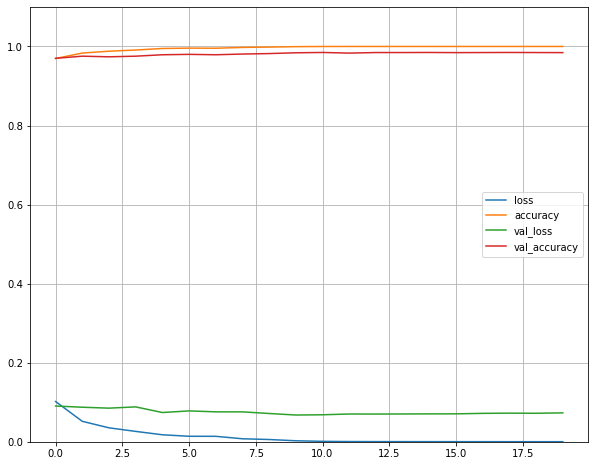

In [52]:
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid()
plt.gca().set_ylim(0,1.1)
plt.show()